In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd

In [13]:
dataset = pd.read_csv('svm.csv')  
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [12]:
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [6]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 

In [7]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)

GaussianNB()

In [8]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


In [9]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 

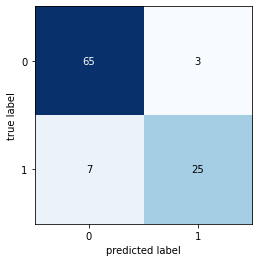

In [10]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
mtp.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


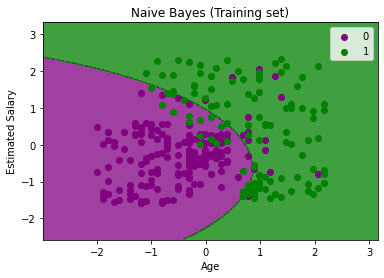

In [11]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  